In [1]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import panda2.panda2 as panda2

import panda2.analysis.fitfunctions as fitfunc

In [6]:
fhit = "/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/injection_scan/20231108_175818_injection_hit.h5"
fraw = "/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/injection_scan/20231108_175818_injection_scan.h5"

[(49, 1, 0, 0, 1526,  244,  10, 0, 3470409184)
 (49, 1, 0, 0, 1569,  243, 223, 0, 3474210272)
 (50, 1, 0, 0, 1848,  284, 200, 0, 3532562752) ...
 (97, 1, 0, 0, 1054, 1228, 226, 0, 6688522296)
 (97, 1, 0, 0, 1118, 1078, 162, 0, 6688653368)
 (97, 1, 0, 0, 1149,  599, 131, 0, 6688784440)]


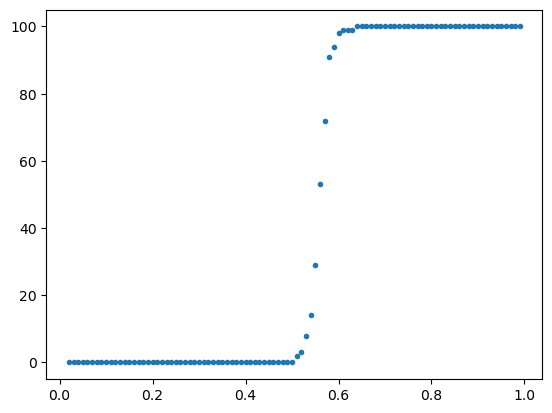

In [4]:
for ffff in flist:
    

    with tb.open_file(fhit) as f:
        dat = f.root.event_data[:]
    with tb.open_file(fraw) as f:
        param = f.root.scan_parameters[:]

    dat0 = dat[dat['comp']==0]
    uni, idx= np.unique(dat0['timestamp'], return_index=True)
    dat0 = dat0[idx]
    nhit = np.bincount(dat0['event_number']) #, minlength=len(param))
    print(dat0)
    plt.plot(param['inj'], nhit, '.', label='faster')

#dat1 = dat[dat['comp']==1]
#print(dat1)
#uni, idx = np.unique(dat1['timestamp'], return_index=True)
#dat1 = dat1[idx]
#nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))
#plt.plot(param['inj']/10, nhit1, '.', label='slower')
#plt.xlabel('Injection[V]')
#plt.ylabel('#')
#plt.legend()

In [5]:
with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]